In [40]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# DIMENSIONES

# CÓDIGO:2184607 
# x = 28

# Y = X/3
# Y = 9.33

# longitud [m]
# L1 = 0.05 * X
# L1 = 1.4

# L2 = L1 * 1.5
# L2 = 2.1

# L3 = 0.5 * L1
# L3 = 0.7

# Carga Distribuida [KN/m]
# W = 0.005 * X + 0.01 * Y
# W = 0.23

# Carga [KN]
# Fuerza = 0.05 * X
# Fuerza = 1.4

#Para la viga quedaría:
viga = {
    "L1": 1.4,
    "L2": 2.1,
    "L3": 0.7,
    "W": 0.23,
    "Fuerza": 1.4,
}

In [42]:
Ay, Ma, x = sp.symbols(" Ay Ma x ")

In [43]:
# FUERZAS EXTERNAS

# ECUACIONES DE EQUILIBRIO EJE Y
Fy = Ay + viga["Fuerza"] - viga["W"] * viga["L1"] / 2 - viga["W"] * ( viga["L3"]) / 2 - viga["W"] * viga["L2"]
F_y = sp.Eq(Fy, 0)
A_y =  sp.solve(F_y)[0]
A_y

-0.675500000000000

In [44]:
# FUERZAS EXTERNAS

# ECUACIÓN DE EQUILIBRIO MOMENTOS
Equilibrio_momentos =  Ma + viga["Fuerza"] * (viga["L1"] + viga["L2"] + viga["L3"]) - viga["W"] * viga["L1"] / 2 * (2 * viga["L1"] / 3) - viga["W"] * viga["L2"] * (viga["L1"] + viga["L2"] / 2) - viga["W"] * viga["L3"] / 2 * (viga["L1"] + viga["L2"] +  viga["L3"] / 3)
Ecuacion_momentos = sp.Eq(Equilibrio_momentos, 0)
Momento_A =  sp.solve(Ecuacion_momentos)[0]
Momento_A

-4.24585000000000

In [45]:
# FUERZAS INTERNAS

# FUERZA CORTANTE Y MOMENTO FLECTOR TRAMO (0 <= x <= L1)
carga_distribuida = viga["W"] * x / viga["L1"]
# - integral carga * dx + V(x)
Vx_1 = A_y - sp.integrate(carga_distribuida, x)

Mx_1 = - Momento_A + sp.integrate(Vx_1, x)
Mx_1

-0.0273809523809524*x**3 - 0.6755*x + 4.24585

In [46]:
# FUERZAS INTERNAS

# FUERZA CORTANTE Y MOMENTO FLECTOR TRAMO (0 <= x <= L2)
Carga_distribuida = viga["W"]
# - integral carga * dx + V(x)
Vx_2 =  Vx_1.subs(x, viga["L1"]) - sp.integrate(Carga_distribuida, x)

Mx_2 = Mx_1.subs(x, viga["L1"]) + sp.integrate(Vx_2, x)
Mx_2

-0.115*x**2 - 0.8365*x + 3.22501666666667

In [47]:
# FUERZAS INTERNAS

# FUERZA CORTANTE Y MOMENTO FLECTOR TRAMO (0 <= x <= L3)

Carga_distribuida = - viga["W"] * x / viga["L3"] +  viga["W"]
# - integral carga * dx + V(x)
Vx_3 = viga["Fuerza"] + Vx_2.subs(x, viga["L2"]) - sp.integrate(Carga_distribuida, x)

Mx_3 = Mx_2.subs(x, viga["L2"]) + sp.integrate(Vx_3, x)
Mx_3

0.0547619047619048*x**3 - 0.115*x**2 + 0.0804999999999998*x + 0.961216666666666

In [48]:
import numpy as np

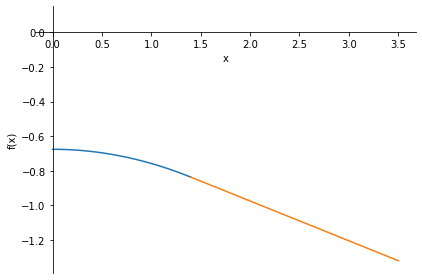

In [49]:
# DIAGRAMA DE FUERZA CORTANTE

x_array = np.arange(0, viga["L1"] + viga["L2"] + viga["L3"] + 0.01, 0.01)
# obtener arrays reemplazando la funcion de cada tramo
tramo1 = sp.lambdify(x, Vx_1)(x_array[x_array <= viga["L1"]])
tramo2 = sp.lambdify(x, Vx_2)(x_array[(x_array > viga["L1"]) & (x_array <= (viga["L1"] + viga["L2"]))] - viga["L1"])
tramo3 = sp.lambdify(x, Vx_3)(x_array[x_array > (viga["L1"] + viga["L2"])] - viga["L1"] - viga["L2"])

Cortante_y = np.concatenate((tramo1, tramo2, tramo3))
sp.plot((Vx_1, (x, 0, viga["L1"])), (Vx_2.subs(x, x - viga["L1"]), (x, viga["L1"], viga["L1"] + viga["L2"])), (Vx_3.subs(x, x - (viga["L1"] + viga["L2"])), (x, (viga["L1"] + viga["L2"]), viga["L1"] + viga["L2"])))

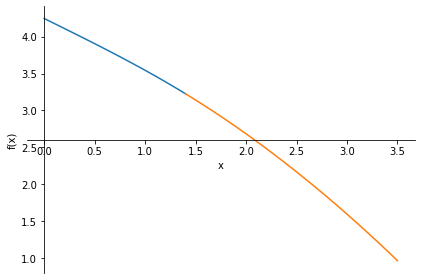

In [50]:
# DIAGRAMA DE MOMENTO FLECTOR

x_array = np.arange(0, viga["L1"] + viga["L2"] + viga["L3"] + 0.01, 0.01)
# obtener arrays reemplazando la funcion de cada tramo
Tramo1 = sp.lambdify(x, Mx_1)(x_array[x_array <= viga["L1"]])
Tramo2 = sp.lambdify(x, Mx_2)(x_array[(x_array > viga["L1"]) & (x_array <= (viga["L1"] + viga["L2"]))] - viga["L1"])
Tramo3 = sp.lambdify(x, Mx_3)(x_array[x_array > (viga["L1"] + viga["L2"])] - viga["L1"] - viga["L2"])

Momento_y = np.concatenate((Tramo1, Tramo2, Tramo3))
sp.plot((Mx_1, (x, 0, viga["L1"])), (Mx_2.subs(x, x - viga["L1"]), (x, viga["L1"], viga["L1"] + viga["L2"])), (Mx_3.subs(x, x - (viga["L1"] + viga["L2"])), (x, (viga["L1"] + viga["L2"]), viga["L1"] + viga["L2"])))

In [51]:
# MOMENTO MÁXIMO

Momento_maximo = 0
Momento_positivo_max = np.amax(Momento_y)
Momento_negativo_max = np.amin(Momento_y)

if np.abs(Momento_negativo_max) > Momento_positivo_max:
    Momento_maximo = np.abs(Momento_negativo_max)
else: 
    Momento_maximo = Momento_positivo_max
Momento_maximo

4.24585

In [52]:
# CORTANTE MÁXIMO

Cortante_maximo = 0
Cortante_positivo_max = np.amax(Cortante_y)
Cortante_negativo_max = np.amin(Cortante_y)

if np.abs(Cortante_negativo_max) > Cortante_positivo_max:
    cortante_maximo = np.abs(Cortante_negativo_max)
else: 
   Cortante_maximo =Cortante_positivo_max

Cortante_maximo

0